<a href="https://colab.research.google.com/github/spshreya/21daysofML/blob/main/Build_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from math import sqrt

In [2]:
#euclidean distance

plot1 = [1,3]
plot2 = [2,4]
sum=0
for i in range(len(plot1)):

  x=plot1[i]-plot2[i]
  x= x**2
  sum+=x
n=sqrt(sum)
n

1.4142135623730951

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import warnings #for avoiding dumb number for k

style.use('fivethirtyeight')

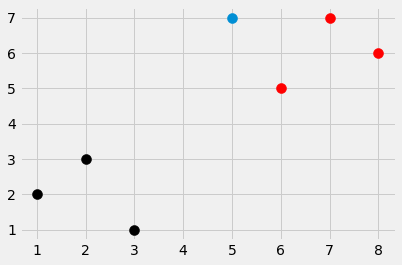

In [8]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_feature=[5,7]

[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_feature[0],new_feature[1], s=100)   #we can clearly see our new feature belongs to r

In [14]:
def knn_(data, predict, k=3):
  if len(data)>=k:
    warnings.warn('try taking a bigger value for k. Hint: take more than the length of data.')
  distance=[]
  for group in data:
    for features in data[group]:
      euclid_dist= np.linalg.norm(np.array(features)-np.array(predict))         #np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
      distance.append([euclid_dist,group])
  
  votes= [i[1] for i in sorted(distance) [:k]]
  results = Counter(votes).most_common(1)[0][0]  #comes in a list
  
  return results

In [15]:
result = knn_(dataset, new_feature, k=3)
result

'r'

In [16]:
#now lets test it on breast cancer dataset


from google.colab import files
uploaded = files.upload()

Saving breastcancer.txt to breastcancer.txt


In [17]:
import pandas as pd
import random

In [21]:
bc= pd.read_csv('breastcancer.txt')
bc.replace('?',-9999, inplace=True)

In [22]:
bc.drop(['id'],1, inplace=True)
full_data= bc.astype(float).values.tolist()

In [23]:
random.shuffle(full_data)

In [24]:
test_size=0.3
train_set={2:[], 4:[]}
test_set={2:[], 4:[]}
train_data=full_data[:-int(test_size*len(full_data))]
test_data=full_data[-int(test_size*len(full_data)):]

In [25]:
for i in train_data:
  train_set[i[-1]].append(i[:-1])
for i in test_data:
  test_set[i[-1]].append(i[:-1])

In [26]:
correct = 0
total =0
for group in test_set:
  for data in test_set[group]:
    vote = knn_(train_set,data,k=5)
    if vote ==  group:
      correct +=1
    total +=1

print('accuracy:', correct/total)

accuracy: 0.9712918660287081


we got the almost same accuracy